In [510]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf', 'var', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [511]:
train = pd.read_csv ('train.csv')

In [512]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [513]:
test = pd.read_csv ('test.csv')

test

In [514]:
#Sale_Price=train.iloc[:,80]
#Sale_Price.shape

In [515]:
df1 = pd.read_csv('data_description.txt', delimiter = "\n")

In [516]:
y_train = train.SalePrice

In [517]:
train.drop('SalePrice', axis = 1, inplace = True)

In [518]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [519]:
train['is_test'] = 0
test['is_test'] = 1

In [520]:
df = pd.concat([train, test])

In [521]:
df.drop('Id', axis = 1, inplace = True)

In [522]:
df.shape

(2919, 80)

In [523]:
total_null = df.isnull().sum().sort_values(ascending=False) #First sum and order all null values for each variable
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #Get the percentage
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471
GarageYrBlt,159,0.054471


In [524]:
df = df.drop((missing_data[missing_data["Percentage"] > 0.05]).index,1) #Drop All Var. with null values > 1

df.isnull().sum()

MSSubClass       0
MSZoning         4
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
is_test          0
Length: 69, dtype: int64

In [525]:
num_col=df._get_numeric_data().columns.tolist()
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'is_test']

In [526]:
cat_col=set(df.columns)-set(num_col)
cat_col

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [528]:
for col in num_col:
    df[col].fillna(df[col].mean(),inplace=True)

In [529]:
for col in cat_col:

    df[col].fillna(df[col].mode()[0],inplace=True)

for i in cat_col:
    print(df[i].value_counts())

In [530]:
train_data = pd.read_csv ('train.csv')

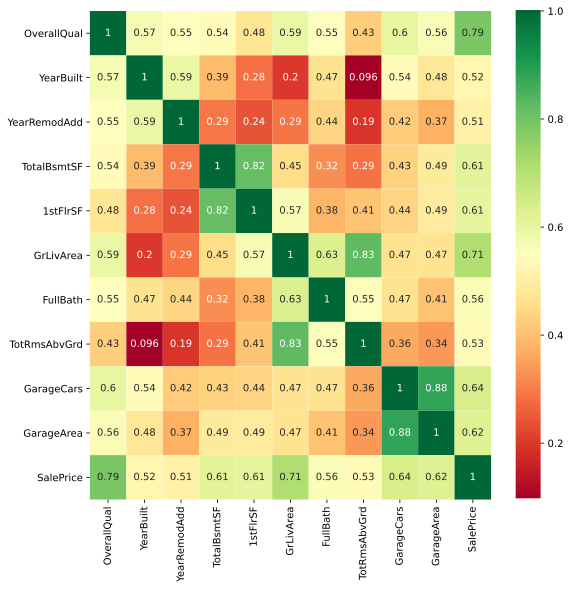

In [531]:
corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(9,9))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [532]:
var = train_data[train_data.columns[1:]].corr()['SalePrice'][:]
var.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [533]:
#droping low version feature
df=df.drop(["MoSold","3SsnPorch","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","MiscVal","OverallCond","YrSold",
            "MSSubClass","EnclosedPorch","KitchenAbvGr","ScreenPorch"],axis=1)

In [535]:
df.shape

(2919, 57)

In [536]:
#here we checking data summury
df.describe()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,is_test
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,10168.114080,6.089072,1971.312778,1984.264474,102.201312,441.423235,560.772104,1051.777587,1159.581706,336.483727,...,0.380267,2.860226,6.451524,0.597122,1.766621,472.874572,93.709832,47.486811,2.251799,0.499829
std,7886.996359,1.409947,30.291442,20.894344,178.626089,455.532750,439.468337,440.690726,392.362079,428.701456,...,0.502872,0.822693,1.569379,0.646129,0.761494,215.357904,126.526589,67.575493,35.663946,0.500086
min,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7478.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,...,0.000000,2.000000,5.000000,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000
50%,9453.000000,6.000000,1973.000000,1993.000000,0.000000,369.000000,467.000000,990.000000,1082.000000,0.000000,...,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000
75%,11570.000000,7.000000,2001.000000,2004.000000,163.500000,733.000000,805.000000,1302.000000,1387.500000,704.000000,...,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,1.000000
max,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,5095.000000,2065.000000,...,2.000000,8.000000,15.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,800.000000,1.000000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness coeff. is: 1.882876
Kurtosis coeff. is: 6.536282


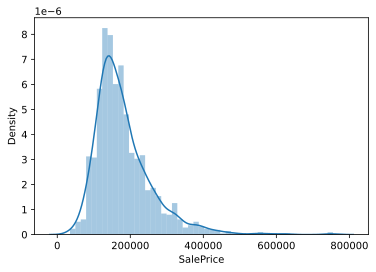

In [537]:
sns.distplot(train_data['SalePrice']);
print("Skewness coeff. is: %f" % train_data['SalePrice'].skew())
print("Kurtosis coeff. is: %f" % train_data['SalePrice'].kurt())

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

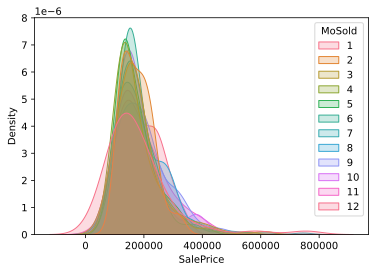

In [538]:
sns.kdeplot(data=train_data,x='SalePrice',hue="MoSold",fill=True,common_norm=False,palette="husl")

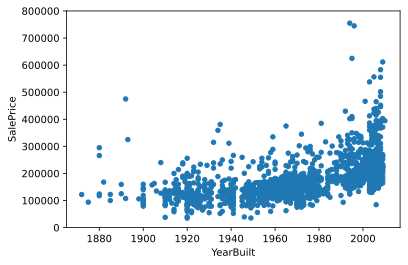

In [539]:
data_year_trend = pd.concat([train_data['SalePrice'], train_data['YearBuilt']], axis=1)
data_year_trend.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,800000));

In [540]:
df_dummies = pd.get_dummies(df)

In [541]:
df_dummies.shape

(2919, 238)

In [542]:
df_dummies.isnull().sum()

LotArea                  0
OverallQual              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 238, dtype: int64

In [546]:
cat_col=set(df.columns)-set(df._get_numeric_data().columns.tolist())
cat_nunique = df[cat_col].nunique()
print(cat_nunique)
cat_feat = list(cat_nunique[cat_nunique < 30].index)

BsmtFinType1      6
SaleType          9
KitchenQual       4
Exterior2nd      16
Electrical        5
Exterior1st      15
BsmtExposure      4
LotShape          4
CentralAir        2
HeatingQC         5
SaleCondition     6
Neighborhood     25
ExterCond         5
MSZoning          5
Condition2        8
LotConfig         5
LandSlope         3
HouseStyle        8
LandContour       4
Condition1        9
MasVnrType        4
Street            2
Utilities         2
PavedDrive        3
BldgType          5
RoofMatl          8
BsmtFinType2      6
RoofStyle         6
BsmtCond          4
ExterQual         4
Foundation        6
Functional        7
BsmtQual          4
Heating           6
dtype: int64


In [547]:
df_dummies

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,854,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,866,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,756,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,1053,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,1970,1970,0.0,0.0,546.0,546.0,546,546,...,0,0,0,1,0,0,0,0,1,0
1455,1894,4,1970,1970,0.0,252.0,294.0,546.0,546,546,...,0,0,0,1,1,0,0,0,0,0
1456,20000,5,1960,1996,0.0,1224.0,0.0,1224.0,1224,0,...,0,0,0,1,1,0,0,0,0,0
1457,10441,5,1992,1992,0.0,337.0,575.0,912.0,970,0,...,0,0,0,1,0,0,0,0,1,0


In [543]:
X_train = df_dummies[df_dummies.is_test == 0].drop('is_test', axis = 1)
X_test = df_dummies[df_dummies.is_test == 1].drop('is_test', axis = 1)

In [544]:
columns = X_train.columns

In [545]:
columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

In [468]:
X_train

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,854,...,0,0,0,1,0,0,0,0,1,0
1,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,866,...,0,0,0,1,0,0,0,0,1,0
3,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,756,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,1053,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,0.0,0.0,953.0,953.0,953,694,...,0,0,0,1,0,0,0,0,1,0
1456,13175,6,1978,1988,119.0,790.0,589.0,1542.0,2073,0,...,0,0,0,1,0,0,0,0,1,0
1457,9042,7,1941,2006,0.0,275.0,877.0,1152.0,1188,1152,...,0,0,0,1,0,0,0,0,1,0
1458,9717,5,1950,1996,0.0,49.0,0.0,1078.0,1078,0,...,0,0,0,1,0,0,0,0,1,0


###### Don't use when DTR

In [469]:
scaler = StandardScaler()

In [470]:
scaler.fit(X_train)

StandardScaler()

In [471]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns)

In [472]:
X_test_scaled = scaler.transform(X_test)

In [473]:
X_train_scaled

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.207142,0.651479,1.050994,0.878668,0.511463,0.575425,-0.944591,-0.459303,-0.793434,1.161852,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.091886,-0.071836,0.156734,-0.429577,-0.574365,1.171992,-0.641228,0.466465,0.257140,-0.795163,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073480,0.651479,0.984752,0.830215,0.323105,0.092907,-0.301643,-0.313369,-0.627826,1.189351,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-0.096897,0.651479,-1.863632,-0.720298,-0.574365,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.375148,1.374795,0.951632,0.733308,1.364614,0.463568,-0.174865,0.199680,-0.045611,1.617877,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,0.918511,0.733308,-0.574365,-0.973018,0.873321,-0.238122,-0.542435,0.795198,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,0.266407,-0.071836,0.222975,0.151865,0.084888,0.759659,0.049262,1.104925,2.355701,-0.795163,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,-0.147810,0.651479,-1.002492,1.024029,-0.574365,-0.369871,0.701265,0.215641,0.065656,1.844744,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.080160,-0.795151,-0.704406,0.539493,-0.574365,-0.865548,-1.284176,0.046905,-0.218982,-0.795163,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [474]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [475]:
Y_train=np.asarray(y_train)

In [476]:
Y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [477]:
X_test_scaled.shape

(1459, 237)

###### DTR model (without scaling)

In [478]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [479]:
for iter in range(0,9):
    X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = iter )
    clf_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=19)
    clf_tree.fit(X_train_val, y_train_val)
    predictions = clf_tree.predict( X_test_val )
    Sc = clf_tree.score(X_test_val, y_test_val)
    print ("for iter %s | Sc: %.4f " % (iter, Sc))

for iter 0 | Sc: 0.7608 
for iter 1 | Sc: 0.8247 
for iter 2 | Sc: 0.6763 
for iter 3 | Sc: 0.7592 
for iter 4 | Sc: 0.7532 
for iter 5 | Sc: 0.7443 
for iter 6 | Sc: 0.7376 
for iter 7 | Sc: 0.7825 
for iter 8 | Sc: 0.7235 


In [480]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split( X_train, y_train, test_size = 0.3, random_state = 1)
clf_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=19)
clf_tree.fit(X_train_val, y_train_val)
y_pred_DTR = clf_tree.predict( X_test )
Sc = clf_tree.score(X_test_val, y_test_val)

In [481]:
y_test_verification = pd.read_csv ('sample_submission.csv')

In [482]:
mse = np.mean((np.log(y_test_verification['SalePrice'])-np.log(y_pred_DTR))**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(np.log(y_test_verification['SalePrice'])-(np.log(y_pred_DTR)))))

mse 0.12267982975791929
sqrt(mse) 0.35025680544126375
avg_error 0.28675200617421964


###### LinearRegression

In [483]:
regression = LinearRegression()

In [484]:
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [485]:
y_pred_LinReg = regression.predict(X_test_scaled)

In [486]:
y_pred_LinReg

array([105879.35977844, 159775.35977844, 187067.35977844, ...,
       165329.35977844, 102467.35977844, 222067.35977844])

In [487]:
["{:10} {:.3f}".format(x, y) for y, x in sorted(zip(regression.coef_,X_train_scaled.columns))]

['RoofMatl_CompShg -367979057372362368.000',
 'RoofMatl_Tar&Grv -240598207936967552.000',
 'RoofMatl_WdShngl -177999868460438976.000',
 'RoofMatl_WdShake -162546772913020544.000',
 'Utilities_NoSeWa -120986823484827120.000',
 'Utilities_AllPub -120986823484826672.000',
 'HouseStyle_1Story -108668540132940848.000',
 'Exterior1st_CBlock -104040750413672304.000',
 'HouseStyle_2Story -100046181875602080.000',
 'CentralAir_N -99644563018284112.000',
 'CentralAir_Y -99644563018283248.000',
 'BsmtFinType2_Unf -95825381706069104.000',
 'Heating_GasA -89439584916392960.000',
 'MasVnrType_None -88133203382331184.000',
 'MasVnrType_BrkFace -82719076435001536.000',
 'RoofMatl_ClyTile -72792979994520384.000',
 'RoofMatl_Roll -72792979994503856.000',
 'RoofMatl_Metal -72792979994502624.000',
 'RoofMatl_Membran -72792979994501552.000',
 'Exterior1st_VinylSd -70327347252167256.000',
 'Heating_GasW -67407708681006888.000',
 'HouseStyle_1.5Fin -66760478580717512.000',
 'BsmtCond_TA -60264429679757104.00

In [488]:
y_test_verification = pd.read_csv ('sample_submission.csv')

In [489]:
y_test_verification['SalePrice']

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

(0.0, 550000.0)

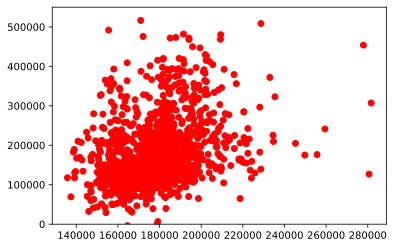

In [490]:
plt.plot(y_test_verification['SalePrice'], y_pred_LinReg, 'ro')
plt.ylim([0, 550000])

In [491]:
mse = np.mean((np.log(y_test_verification['SalePrice'])-np.log(y_pred_LinReg))**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(np.log(y_test_verification['SalePrice'])-(np.log(y_pred_LinReg)))))

mse 1.4692122558912242
sqrt(mse) 1.212110661569819
avg_error 0.36896138592115413


<ipython-input-491-e87d9635e9a0>:1: RuntimeWarning: invalid value encountered in log
  mse = np.mean((np.log(y_test_verification['SalePrice'])-np.log(y_pred_LinReg))**2)
<ipython-input-491-e87d9635e9a0>:4: RuntimeWarning: invalid value encountered in log
  print('avg_error', np.mean(abs(np.log(y_test_verification['SalePrice'])-(np.log(y_pred_LinReg)))))


###### Bagging

In [492]:
from sklearn.ensemble import BaggingRegressor

bag_clf = BaggingRegressor(n_estimators=20, base_estimator=clf_tree, n_jobs=-1)
bag_clf.fit(X_train_val, y_train_val)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=7,
                                                      min_samples_leaf=19),
                 n_estimators=20, n_jobs=-1)

In [493]:
y_pred_DTR = bag_clf.predict( X_test )
mse = np.mean((np.log(y_test_verification['SalePrice'])-np.log(y_pred_DTR))**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(np.log(y_test_verification['SalePrice'])-(np.log(y_pred_DTR)))))

mse 0.10802069758080282
sqrt(mse) 0.32866502336087244
avg_error 0.27846250486392415


In [494]:
cross_val_score( DecisionTreeRegressor( max_depth = 7, criterion = 'mse' ), X_train, Y_train, cv = 10 )

array([0.76968816, 0.79097495, 0.83310904, 0.76323742, 0.8311962 ,
       0.82290832, 0.79957139, 0.77283829, 0.66340897, 0.74156427])

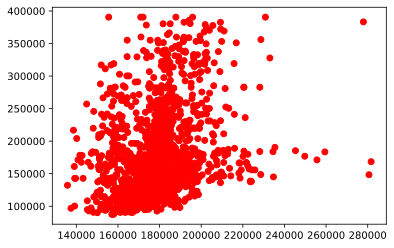

In [495]:
plt.plot(y_test_verification['SalePrice'], y_pred_DTR, 'ro')

In [496]:
from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_leaf=20, max_features=0.6, n_jobs=-1)

clf_rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=15, max_features=0.6, min_samples_leaf=20,
                      n_jobs=-1)

In [497]:
y_rf_test = clf_rf.predict(X_test)

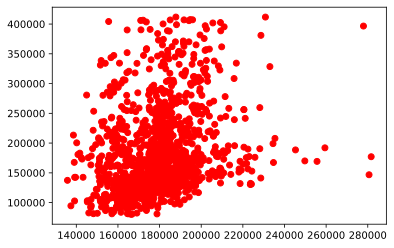

In [498]:
plt.plot(y_test_verification['SalePrice'], y_rf_test, 'ro')

In [499]:
mse = np.mean((np.log(y_test_verification['SalePrice'])-np.log(y_rf_test))**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(np.log(y_test_verification['SalePrice'])-(np.log(y_rf_test)))))

mse 0.11386132117202337
sqrt(mse) 0.33743343220852223
avg_error 0.283431831248653


<AxesSubplot:>

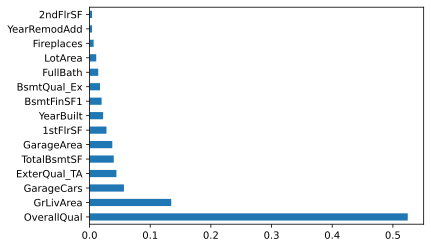

In [500]:
imp = pd.Series(clf_rf.feature_importances_, index = X_train.columns)
imp.sort_values(ascending = False).iloc[:15].plot(kind = 'barh')

In [501]:
class MeanClassifier():
    def __init__(self, col):
        self._col = col
        
    def fit(self, X, y):
        self._y_mean = y.mean()
        self._means = y.groupby(X[self._col].astype(str)).mean()

    def predict(self, X):
        new_feature = X[self._col].astype(str)\
            .map(self._means.to_dict())\
            .fillna(self._y_mean)
        return np.stack([1-new_feature, new_feature], axis=1)

In [503]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test_verification['SalePrice'], dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])#[:, 1]
        meta_test += clf.predict(X_test)#[:, 1]
    
    return meta_train, meta_test / stack_cv.n_splits

from sklearn.svm import LinearSVC

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

class SVMWrapper(LinearSVC):
    def predict(self, X):
        df = norm(self.decision_function(X))
        return np.stack([1-df, df], axis=1)

clf_svm = SVMWrapper(C=0.001)    
clf_svm.fit(X_train_scaled, y_train)

y_pred_svm = clf_svm.predict(X_test_scaled)


In [504]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555, shuffle = True)

meta_train = []
meta_test = []
col_names = []

print('SVM features...')
meta_tr, meta_te = get_meta_features(clf_svm, X_train_scaled, y_train, X_test_scaled, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('svm_pred')

In [549]:
print('mean features...')
for c in cat_nunique.index.tolist():
    clf = MeanClassifier(c)
    
    meta_tr, meta_te = get_meta_features(clf, X_train, y_train, X_test, stack_cv)

    meta_train.append(meta_tr)
    meta_test.append(meta_te)
    col_names.append('mean_pred_{}'.format(c))

print('LR features...')
meta_tr, meta_te = get_meta_features(regression, X_train_scaled, y_train, X_test_scaled, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lr_pred')

print('RF features...')
meta_tr, meta_te = get_meta_features(regression, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('rf_pred')

mean features...


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


KeyError: 'BsmtFinType1'

In [421]:
col_names

['lr_pred', 'rf_pred']

In [422]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)
X_meta_train

,lr_pred,rf_pred
0,207482.500000,207010.658321
1,201130.000000,200918.928371
2,212785.489631,213163.364595
3,173262.000000,173293.773079
4,292646.281250,293302.243110
...,...,...
1455,175770.000000,176253.531003
1456,202966.000000,202573.918084
1457,278245.000000,275526.934465
1458,141416.000000,142026.262880


In [423]:
X_meta_test

,lr_pred,rf_pred
0,107021.049329,106940.933848
1,160568.649329,160639.317736
2,186672.649329,186585.387393
3,188531.849329,188355.311227
4,200580.249329,201390.324641
...,...,...
1454,68883.049329,69022.365028
1455,72327.649329,72184.493819
1456,164667.649329,165064.724885
1457,102387.449329,102779.052892
